##### Import Required Libraries - 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


In [50]:
df = pd.read_csv("files/placement.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0
...,...,...,...,...
95,95,4.3,200,0
96,96,4.4,42,0
97,97,6.7,182,1
98,98,6.3,103,1


In [51]:
df.shape

(100, 4)

##### Steps - 
<p style="color:yellow"># 0. Preprocessing + EDA + Feature Selection</p>
<p style="color:yellow"># 1. Extract Input and Output Columns</p>
<p style="color:yellow"># 2. Scale The Values</p>
<p style="color:yellow"># 3. Train Test Split</p>
<p style="color:yellow"># 4. Train The Model</p>
<p style="color:yellow"># 5. Evaluate the Model/Model Selection</p>
<p style="color:yellow"># 6. Deploy The Model</p>


##### 0. Preprocesing + EDA + Feature Selection

In [52]:
df = df.iloc[:,1:]

In [53]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


Text(0, 0.5, 'iq')

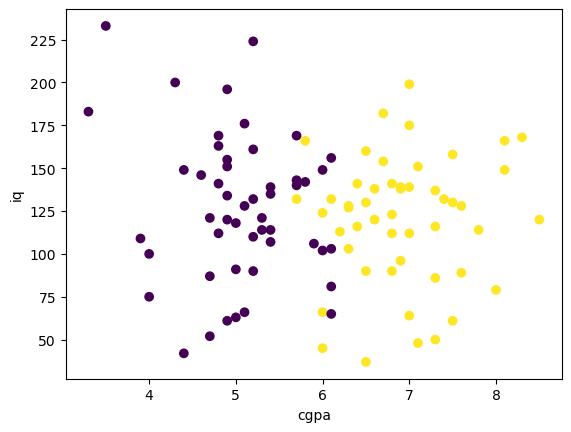

In [54]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])
plt.xlabel("cgpa")
plt.ylabel("iq")

##### 1. Extract Input and Output Columns

In [55]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2:]

In [56]:
X.head()
Y.head()

,placement
0,1
1,0
2,0
3,1
4,0


##### Train Test Split

In [57]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.1)
X_train
X_test
Y_test

,placement
67,0
51,0
47,0
81,0
61,1
22,0
74,1
90,1
65,1
98,1


##### Scale The Values

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 3.70242026e-01,  4.40570592e-01],
       [ 1.85609459e-02, -1.90190935e+00],
       [ 1.94401486e-01, -2.42652726e-01],
       [ 8.97763646e-01, -1.43829353e+00],
       [-8.60641754e-01, -1.46269436e+00],
       [-1.82776472e+00, -3.40256057e-01],
       [-1.12440256e+00, -1.73110353e+00],
       [-6.84801214e-01, -3.15855224e-01],
       [-1.73984445e+00, -5.59863552e-01],
       [-5.96880944e-01, -2.18251893e-01],
       [ 1.77696635e+00, -1.07228104e+00],
       [ 2.82321756e-01,  9.89589329e-02],
       [ 8.97763646e-01, -2.67053559e-01],
       [-7.72721484e-01, -1.38949187e+00],
       [ 1.33736500e+00,  8.55384749e-01],
       [ 1.16152446e+00, -1.69450228e-01],
       [ 1.60112581e+00, -2.18251893e-01],
       [ 5.46082566e-01, -7.18468965e-02],
       [-5.08960674e-01,  3.91768926e-01],
       [-5.96880944e-01, -4.74460637e-02],
       [ 8.09843376e-01, -6.57466883e-01],
       [-1.57279594e-01,  1.05059141e+00],
       [ 5.46082566e-01,  3.67368094e-01],
       [ 1.

In [60]:
X_test = scaler.transform(X_test)

In [61]:
X_test

array([[-0.86064175, -0.12064856],
       [-1.03648229,  0.44057059],
       [-0.68480121,  0.92858725],
       [-0.50896067, -0.38905772],
       [ 1.16152446,  0.34296726],
       [-0.94856202, -0.0718469 ],
       [ 0.63400284,  0.75778142],
       [ 1.16152446, -0.90147521],
       [ 1.86488662,  1.05059141],
       [ 0.28232176, -0.48666105]])

##### Model Training - 

In [62]:
clf = LogisticRegression()

In [63]:
clf.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##### Evaluate the Model

In [64]:
y_pred = clf.predict(X_test)

In [65]:
Y_test

,placement
67,0
51,0
47,0
81,0
61,1
22,0
74,1
90,1
65,1
98,1


In [66]:
accuracy_score(Y_test,y_pred)

1.0

<Axes: >

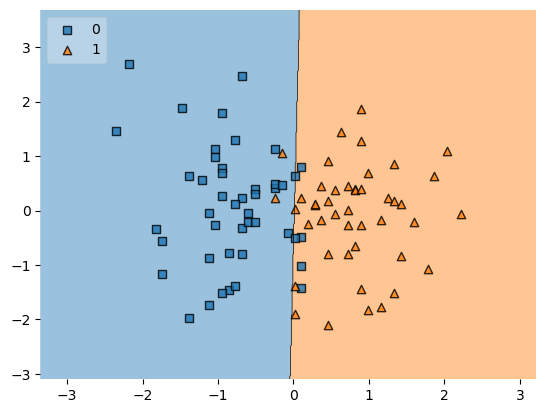

In [67]:
plot_decision_regions(X_train,Y_train["placement"].values,clf=clf,legend=2)

In [68]:
import pickle

In [69]:
pickle.dump(clf,open('model.pk1','wb'))